# Project 11 - Social Networks and Recommendation Systems

#### P11.1 Implement simulation of SIS model on ER graph. Compare results with our analytical findings. [2P]

In [31]:
# importing libraries

import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

In [32]:
%matplotlib notebook

#### Implementation of SIS model

In [34]:
class SIS_Model:
    def __init__(self, G, beta, gamma):
        self.beta = beta
        self.gamma = gamma
        self.G = G
        
        self.initializeNodes()
        
    def initializeNodes(self): 
        self.is_infected ={node: False for node in self.G.nodes} # dictionary for saving infected people nodes
        self.is_infected[0] = True # first person is infected, starting the epidemic
        self.time = 0
        
    def iterate(self):
        if all(self.is_infected.values()) :
            return self.initializeNodes()
        
        infected_in_curr_it = {}
        for person in self.G.nodes:
            
            # if it is not infected ( susceptible) - for each infected neighbor, there is a beta probability of becoming infected
            if not self.is_infected[person]:
                infected_in_curr_it[person] = any(np.random.uniform() < self.beta
                                               for neighbors in self.G.neighbors(person) if self.is_infected[neighbors])
            # if it is infected
            else:
                infected_in_curr_it[person] =  np.random.uniform() > self.gamma # people can return to "susceptible" with probability gamma
        # iteration ends
        self.is_infected = infected_in_curr_it
        self.time += 1
        


<IPython.core.display.Javascript object>


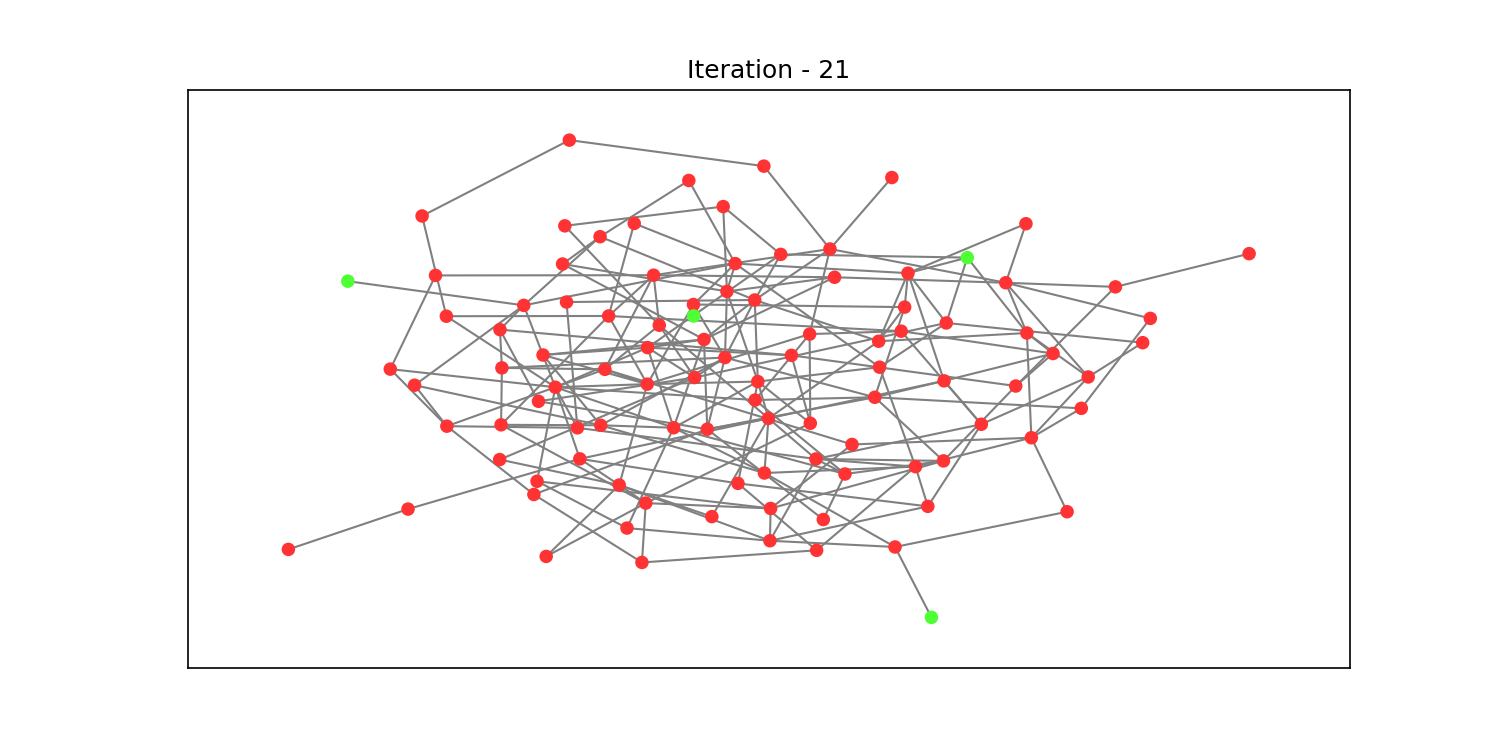

In [24]:


fig, ax = plt.subplots(figsize=(10, 5))

er = SIS_Model(nx.generators.erdos_renyi_graph(n=100, p=0.05), beta=0.2, gamma=0.01) # high probability of infection, low of recovering
pos = nx.kamada_kawai_layout(er.G)
graph_args = {"pos": pos, "ax": ax, "node_size": 30, "with_labels": False, "edge_color": "gray"}

def init():
    ax.clear()
    er.initializeNodes()
    return ax
    

def update(frame): 
    er.iterate()
    ax.clear()
    ax.set_title(f"Iteration - {er.time}")
    nx.draw_networkx(er.G,  
                     node_color=[(1, 0.2, 0.2) if er.is_infected[node] else (0.3, 1, 0.2) for node in er.G.nodes()],
                     **graph_args)
    return ax

ani = FuncAnimation(fig, update, frames=range(100), interval=1000, init_func=init)



Stable solutions are i = 0 or i = 1 - $\gamma/(\beta*k)$. Still we can from the above simulation that it is the second case. In the simulation below, when the chaces of curing are higher, it was inverse:

<IPython.core.display.Javascript object>


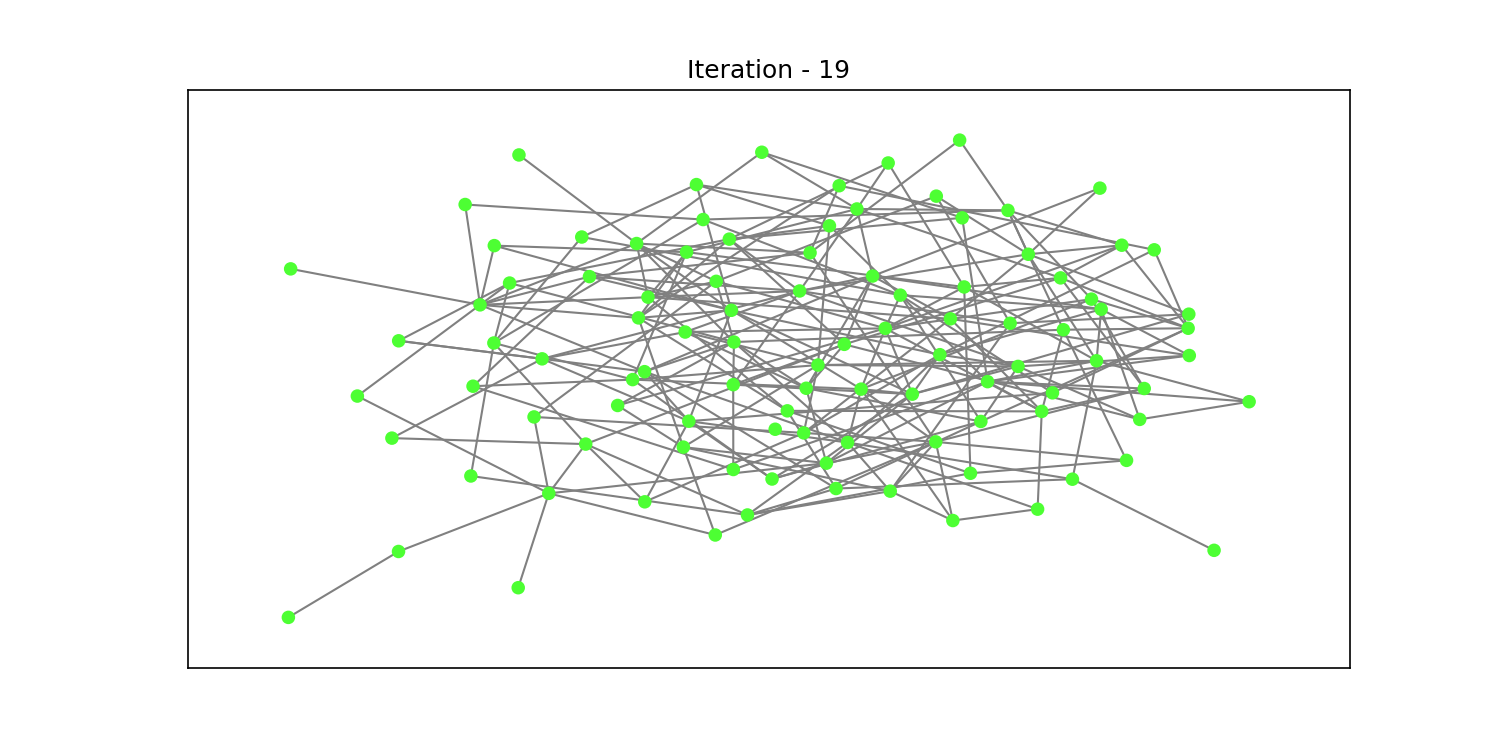

In [37]:


fig, ax = plt.subplots(figsize=(10, 5))

er = SIS_Model(nx.generators.erdos_renyi_graph(n=100, p=0.05), beta=0.05, gamma=0.3) # low probability of infection, high of recovering
pos = nx.kamada_kawai_layout(er.G)
graph_args = {"pos": pos, "ax": ax, "node_size": 30, "with_labels": False, "edge_color": "gray"}

def init():
    ax.clear()
    er.initializeNodes()
    return ax
    

def update(frame): 
    er.iterate()
    ax.clear()
    ax.set_title(f"Iteration - {er.time}")
    nx.draw_networkx(er.G,  
                     node_color=[(1, 0.2, 0.2) if er.is_infected[node] else (0.3, 1, 0.2) for node in er.G.nodes()],
                     **graph_args)
    return ax

ani = FuncAnimation(fig, update, frames=range(100), interval=1000, init_func=init)



#### P11.2  Implement simulation of SIS model on BA networks. Compare results with our analytical findings. 

<IPython.core.display.Javascript object>


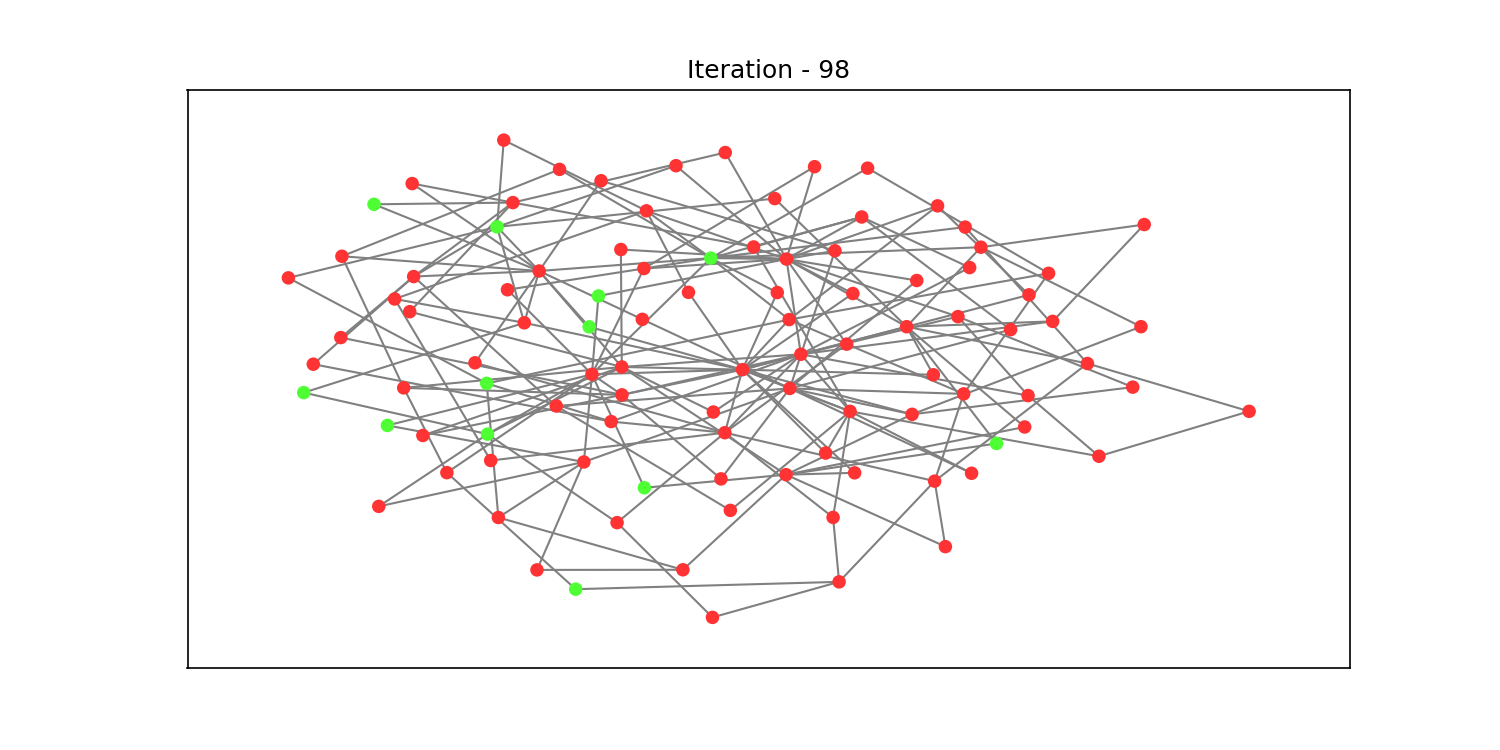

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))

er = SIS_Model(nx.generators.barabasi_albert_graph(n=100, m=2), beta=0.2, gamma=0.05) # high probability of infection, low of recovering
pos = nx.kamada_kawai_layout(er.G)
graph_args = {"pos": pos, "ax": ax, "node_size": 30, "with_labels": False, "edge_color": "gray"}

def init():
    ax.clear()
    er.initializeNodes()
    return ax
    

def update(frame): 
    er.iterate()
    ax.clear()
    ax.set_title(f"Iteration - {er.time}")
    nx.draw_networkx(er.G,  
                     node_color=[(1, 0.2, 0.2) if er.is_infected[node] else (0.3, 1, 0.2) for node in er.G.nodes()],
                     **graph_args)
    return ax

ani = FuncAnimation(fig, update, frames=range(100), interval=1000, init_func=init)

